# Homework 4 

## Joining Data

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 as sql
import re

In [3]:
cell_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv')

We start by cleaning the data as we did in homework 3.

In [4]:
for cell in range(len(cell_df)):
    if np.isnan(cell_df.loc[cell,'1960']):
        cell_df.loc[cell,'1960'] = 0.0

cleaned_cell_df = cell_df.fillna(method='ffill', axis= 1)

cleaned_cell_df.iloc[:,1:] = cleaned_cell_df.iloc[:,1:]\
    .replace({'k' :'e3', 'M' : 'e6', 'B': 'e9'}, regex = True)\
    .astype(float)

In [5]:
pop_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/pop_data.csv')

We want to know if there is a row that don't have any information about the population at all.

In [6]:
rows_with_all_nan = pop_df.iloc[:, 2:].isna().all(axis=1)

for i in range(len(rows_with_all_nan)):
    if rows_with_all_nan[i]:
        print('The row', i, 'only contains Nan')

The row 110 only contains Nan


We can see from the output that row 110 only contains Nan. Because of this we choose to delete that row from the data frame. The first column is also unnecessary so we remove that column aswell.

In [7]:
cleaned_pop_df = pop_df.drop(index=110)\
    .reset_index(drop = True)\
    .iloc[:, 1:]

In [8]:
cleaned_pop_df

,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
261,YEM,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,...,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
262,ZAF,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,...,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
263,ZMB,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,...,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0


If a country is missing data in 1960 we don't want to set the value to 0 because that seems improbible, later we will also devide the amount of cell phones with the population and we can't devide by 0. Because of this we choose to backward fill. First we want to know if there is some minning values in the year 2020.

In [9]:
nan_in_2020 = cleaned_pop_df.iloc[:, 61].isna()
for i in range(len(nan_in_2020)):
    if nan_in_2020[i]:
        print('The row', i, 'has Nan in the column 2020')

Because we don't get an output we know that all the countries have data in the year 2020 so we can now backward fill.

In [10]:
clean_pop_df = cleaned_pop_df.bfill(axis=1)

Now we want to pivot the data frame.

In [11]:
pivot_pop_df = clean_pop_df.melt(id_vars ='iso-3', var_name='year', value_name='population')
pivot_pop_df.head()

,iso-3,year,population
0,ABW,1960,54608.0
1,AFE,1960,130692579.0
2,AFG,1960,8622466.0
3,AFW,1960,97256290.0
4,AGO,1960,5357195.0


We now do the same for the cell phones.

In [12]:
pivot_cell_df = cleaned_cell_df.melt(id_vars='iso-3', var_name='year', value_name='n_cellphones')
pivot_cell_df.head()

,iso-3,year,n_cellphones
0,ABW,1960,0.0
1,AFG,1960,0.0
2,AGO,1960,0.0
3,ALB,1960,0.0
4,AND,1960,0.0


Now, we join the two data frames and presents the table asked for in exercise.

In [13]:
cell_pop_df = pivot_cell_df.merge(pivot_pop_df, on =['iso-3','year'], how ='inner')

cell_pop_df.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,AFG,1960,0.0,8622466.0
2,AGO,1960,0.0,5357195.0
3,ALB,1960,0.0,1608800.0
4,AND,1960,0.0,9443.0


We read the country data.

In [14]:
country_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/country_data.csv')\
    .rename(columns={'alpha-3':'iso-3'})

country_df.head()

,name,alpha-2,iso-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


We join the country data with the cell phone and population data.

In [15]:
merged_df = cell_pop_df.merge(country_df, on='iso-3')
merged_df.head()

,iso-3,year,n_cellphones,population,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,ABW,1960,0.0,54608.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,ABW,1965,0.0,58782.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
2,ABW,1966,0.0,59291.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
3,ABW,1967,0.0,59522.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
4,ABW,1968,0.0,59471.0,Aruba,AW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


We creat a new column for phones per capita.

In [16]:
merged_df['phones per capita']= merged_df['n_cellphones']/merged_df['population']

Creat the table asked for in the exercise.

In [17]:
percap = merged_df.pivot(columns='name', index='year', values = 'phones per capita')
percap.sort_values('2019', axis=1, ascending = False).tail().iloc[:, :5]

name,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2015,3.088231,2.290401,2.007424,1.956838,1.58426
2016,3.14351,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.8499
2019,3.284849,2.86365,2.127739,1.99746,1.987196


Now we want to plot the cell phones per capita over the past 10 years for these countries.

In [22]:
top_5 = percap.sort_values('2019', axis=1, ascending = False).tail(10).iloc[:, :5].reset_index()

Now we plot.

<AxesSubplot:xlabel='year', ylabel='Phones per capita'>

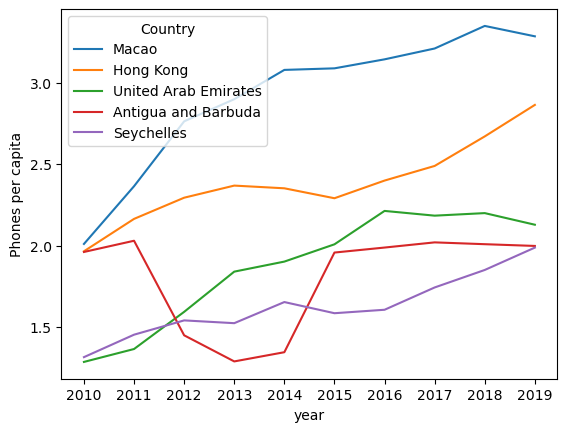

In [25]:
#HJÄÄÄÄÄÄLP

# Omvandla DataFrame till long-form
top_5_melted = top_5.melt(id_vars=["year"], var_name="Country", value_name="Phones per capita")

sns.lineplot(data=top_5_melted, x="year", y="Phones per capita", hue="Country")

From the plot above we can see that Macao seems to have the highest growth rate for the past 10 years.

## SQL

In [28]:
conn = sql.connect('./user_actions.db')
cursor = conn.cursor()

We start by finding the tables and the columns in the tables in the data base.

In [30]:
tables = list(cursor.execute("SELECT name,sql FROM sqlite_master WHERE type='table';"))
tables

[('user_actions',
  'CREATE TABLE user_actions (\n    user_id INTEGER,\n    username TEXT,\n    email TEXT,\n    action TEXT,\n    timestamp TEXT\n)')]

Retrive the usernames of all users who have signed up.

In [35]:
query1 = """
SELECT username
FROM user_actions
WHERE action = 'signup';
"""

pd.read_sql_query(query1, conn)

,username
0,user34
1,user28
2,user1
3,user24
4,user15
5,user20
6,user18
7,user25
8,user3
9,user9


Now we want find the total number of log entries for each user.

In [37]:
query2 = """
SELECT user_id, username,
    COUNT(action) AS action_count
FROM user_actions
GROUP BY user_id
"""

pd.read_sql_query(query2, conn)

,user_id,username,action_count
0,1,user1,104
1,2,user2,149
2,3,user3,108
3,4,user4,436
4,5,user5,192
5,6,user6,457
6,7,user7,362
7,8,user8,329
8,9,user9,118
9,10,user10,170


Now we want to identify users who have both logged in and signed up on the same day.

In [41]:
query3 = """
SELECT DISTINCT U1.user_id, U1.username

FROM user_actions AS U1, user_actions AS U2

WHERE DATE(U1.timestamp)=DATE(U2.timestamp)
    AND U1.action='login' AND U2.action='signup'
    AND U1.user_id = U2.user_id
"""

pd.read_sql_query(query3,conn)

,user_id,username
0,8,user8
1,12,user12
2,30,user30
3,7,user7
4,22,user22
5,5,user5
6,2,user2
7,32,user32


## Regex

In [56]:
f = open('comments.txt', 'r')
comments= f.read()

In [57]:
pattern_hashtag = r'#\w+'

hashtag = re.findall(pattern_hashtag,comments)
#print(hashtag)  

Now we create a regular expression to find comments that mention both "#programming" and "#python".

In [ ]:
patter1= r'\d+\.\b#programming\b\b#python\b'